In [1]:
#Import all the necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Using pandas read the data into the notebook

df = pd.read_csv('/Users/mehakagrawal/Desktop/Cardiovascular_Disease_Dataset.csv')

print(df.head())

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2    

In [3]:
df.shape

(1000, 14)

In [4]:
df.describe

<bound method NDFrame.describe of      patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                    0                1     

In [5]:
df.dtypes

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object

In [6]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [7]:
#Check for any null/missing values

df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [8]:
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [16]:
#Define the target variable

target = 'target'
print(df['target'].value_counts())

print(df['chestpain'].value_counts()) 
#0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic

print(df['restingrelectro'].value_counts())
#0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

print(df['slope'].value_counts())
#1-upsloping, 2-flat, 3-downsloping

1    580
0    420
Name: target, dtype: int64
0    420
2    312
1    224
3     44
Name: chestpain, dtype: int64
0    454
1    344
2    202
Name: restingrelectro, dtype: int64
2    322
1    299
3    199
0    180
Name: slope, dtype: int64


In [17]:
## Create numerical and categorical columns and print the length

numerical = df.select_dtypes(include=['float64', 'int64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 0 Categorical variables
There are 14 Numerical variables


In [18]:
#X represents input features and y is the target value

X = df.drop('target', axis=1)
y = df['target']

In [19]:
#Perform standard scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split the dataset into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# Train a Gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Prediction on test set
y_pred = gb_clf.predict(X_test)
y_prob = gb_clf.predict_proba(X_test)[:, 1]

In [22]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.98      0.97      0.98       117

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

ROC-AUC Score: 1.00


In [23]:
# Perform GridSearchCV with cross-validation and obtain the Best Parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [24]:
#Import visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Count of people with/without Heart Disease')

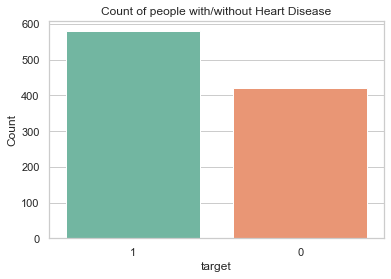

In [25]:
#Barplot
sns.set(style="whitegrid")
ax = sns.countplot(x = target, 
                data=df,
                palette='Set2',
                order = df['target'].value_counts().index
                )
ax.set_ylabel('Count')
plt.title('Count of people with/without Heart Disease')

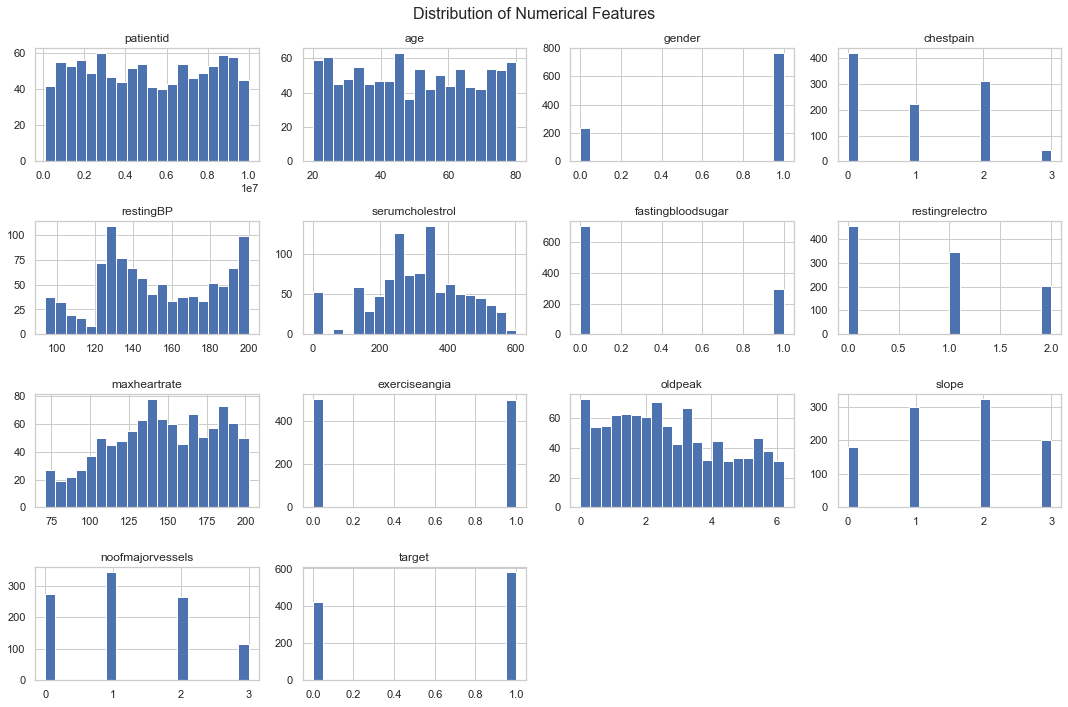

In [27]:
#Histogram
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

#Gender: 0-female, 1-male

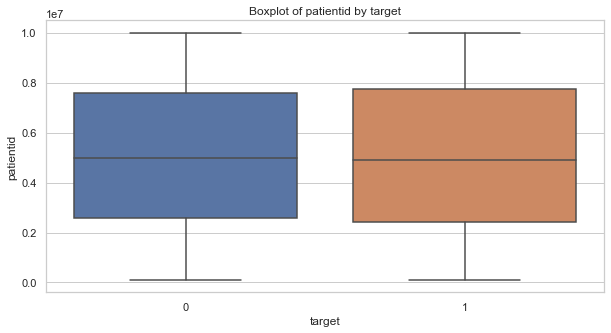

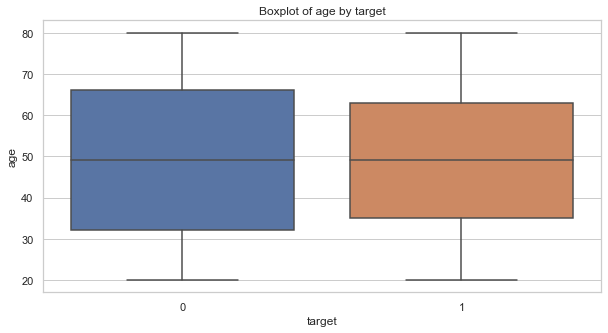

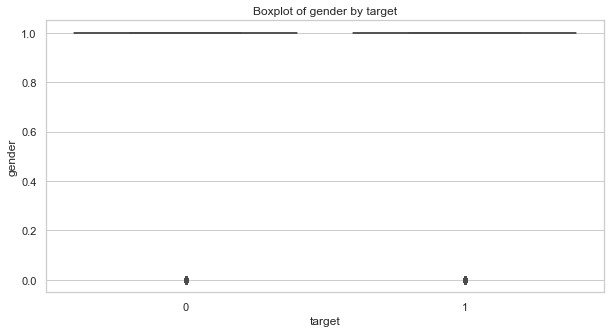

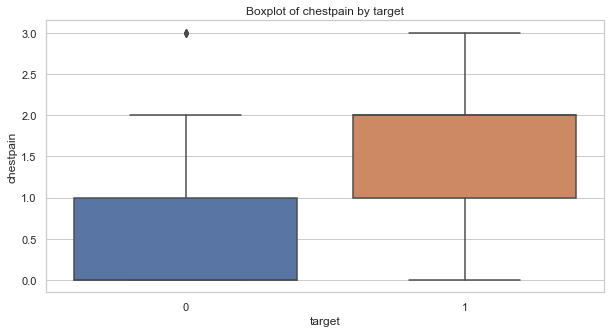

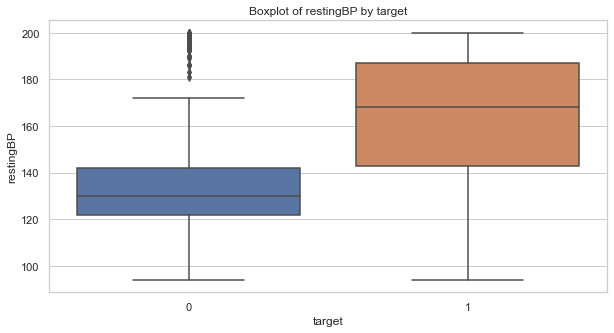

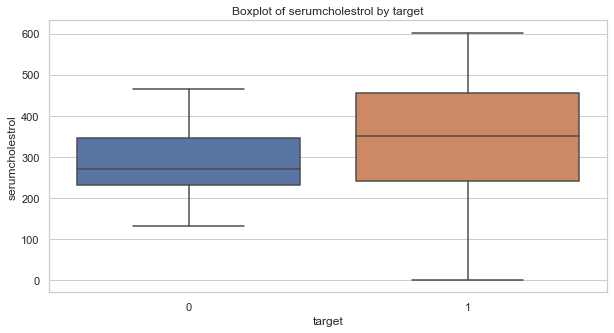

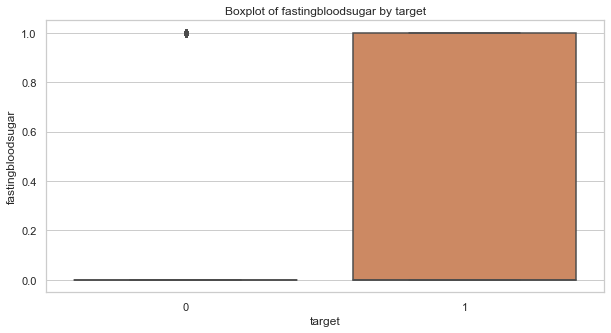

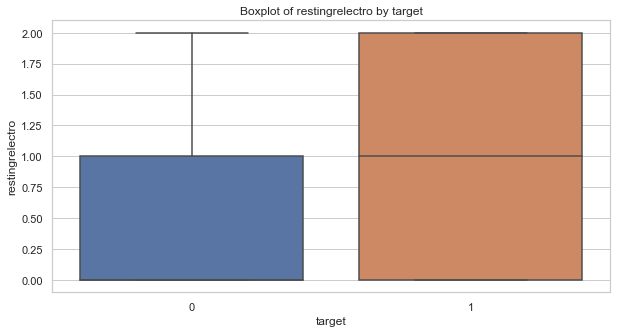

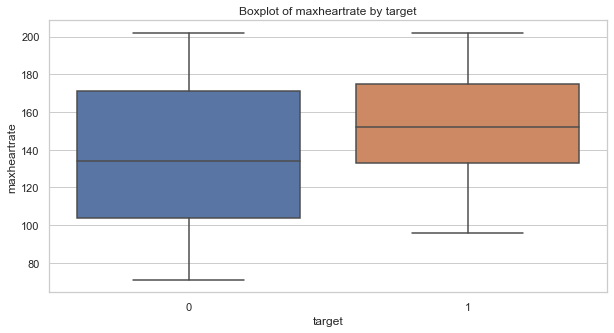

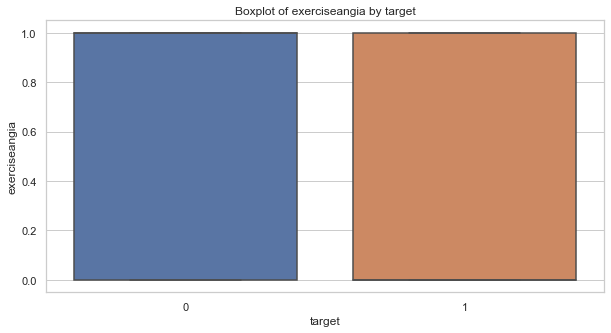

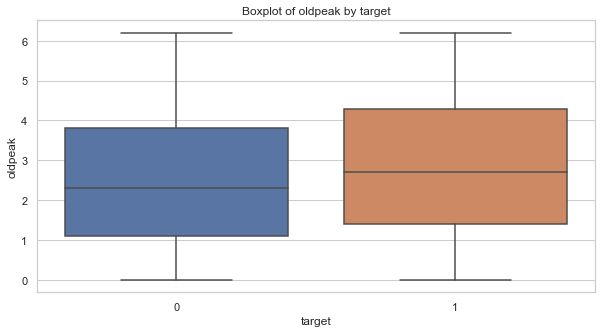

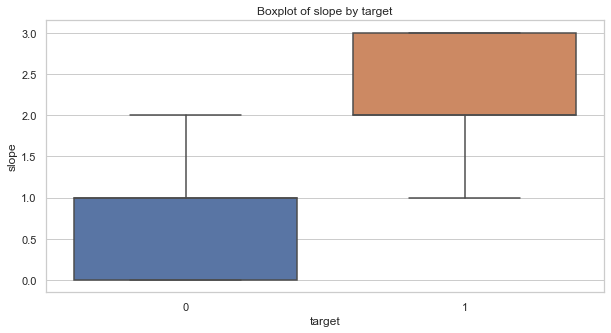

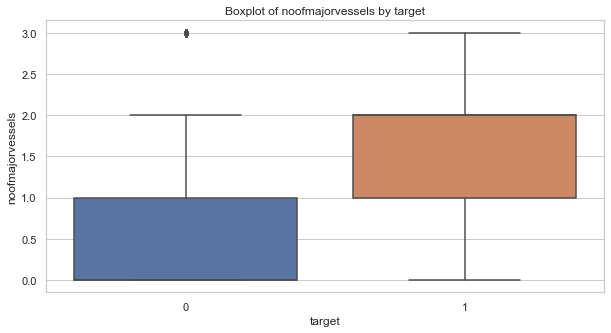

In [28]:
#Boxplot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
target = 'target'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f'Boxplot of {col} by {target}')
        plt.show()

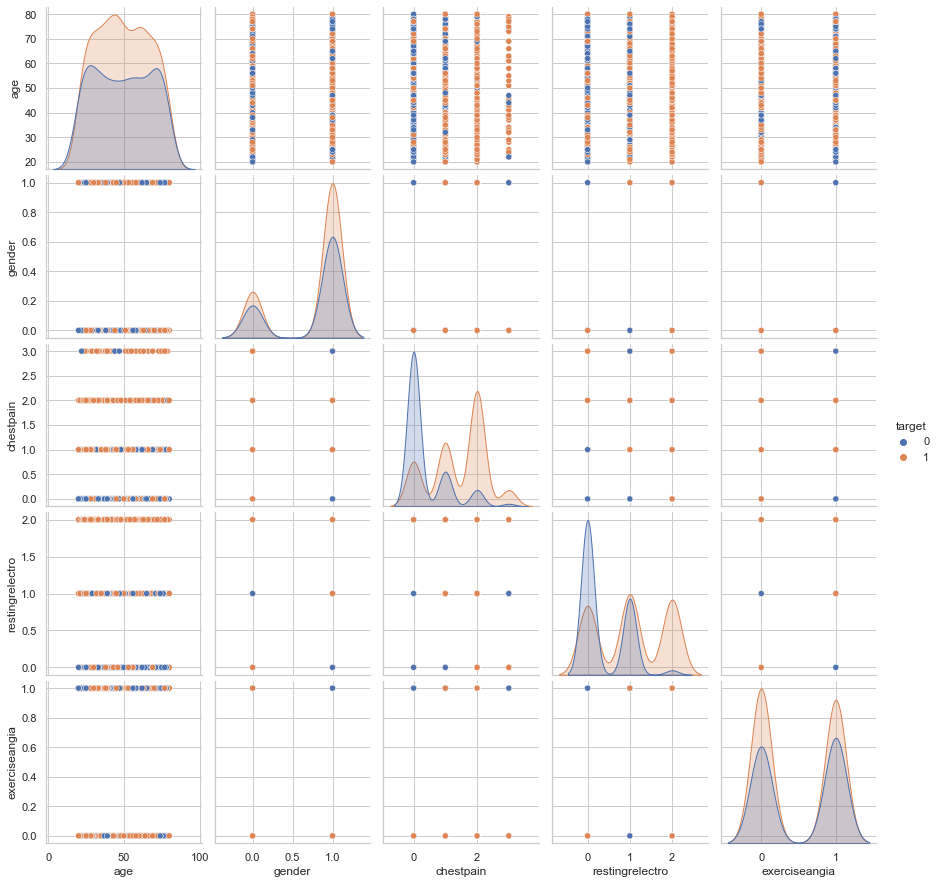

In [30]:
#Pairplot
sns.pairplot(df[['age', 'gender', 'chestpain', 'restingrelectro', 'exerciseangia', 'target']], hue='target')
plt.show()

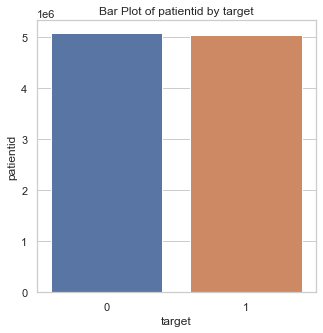

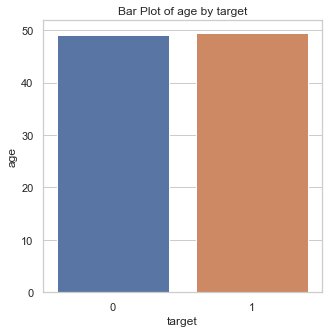

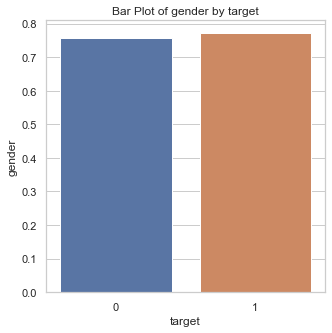

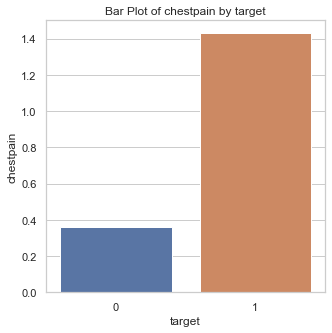

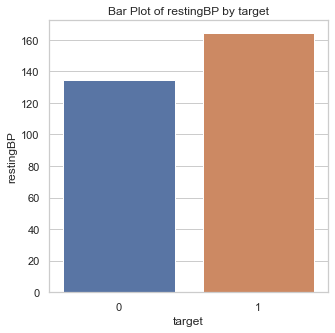

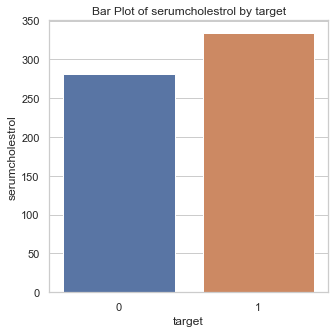

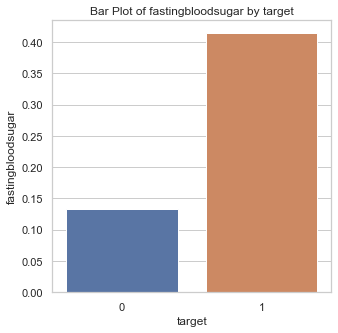

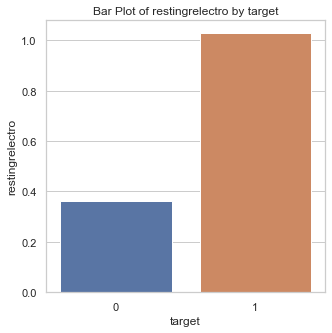

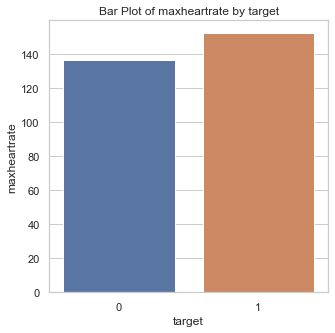

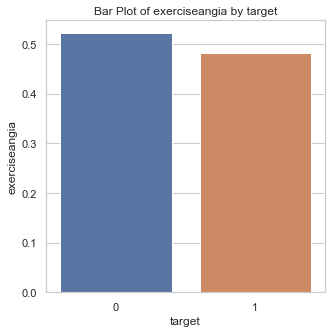

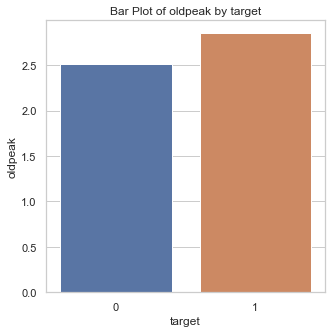

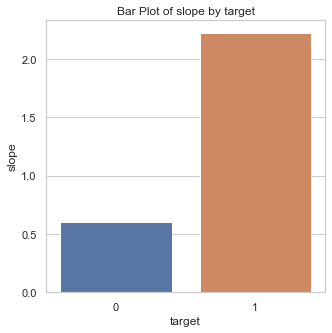

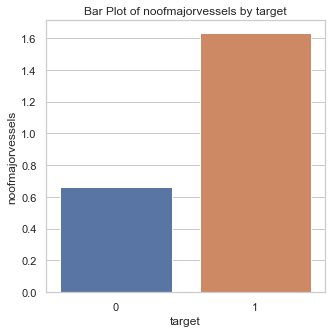

In [31]:
#Barplot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
target = 'target'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(5, 5))
        sns.barplot(x=target, y=col, data=df, ci=None)
        plt.title(f'Bar Plot of {col} by {target}')
        plt.show()

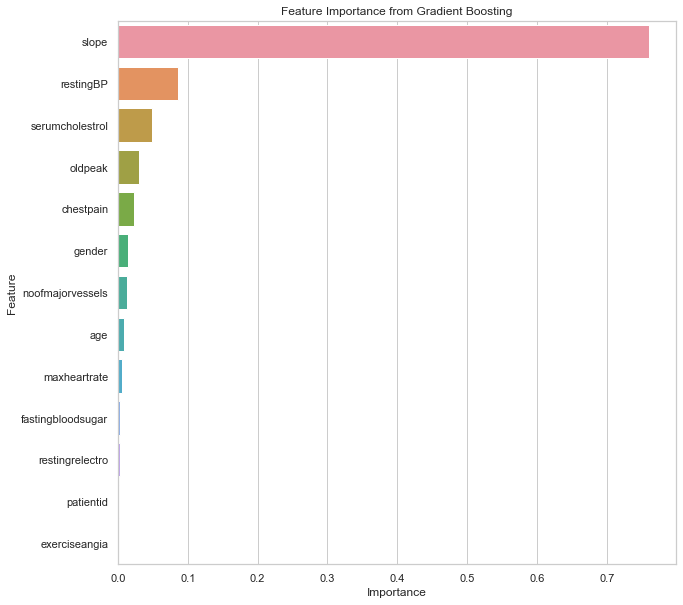

In [32]:
#Plot for Feature Importance
fea_imp = gb_clf.feature_importances_
fea = X.columns

imp_df = pd.DataFrame({'Feature': fea, 'Importance': fea_imp})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title('Feature Importance from Gradient Boosting')
plt.show()

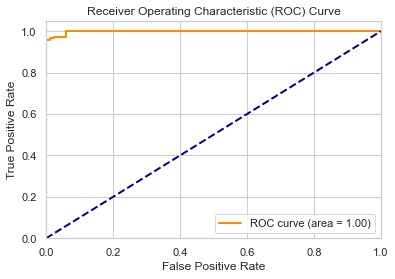

In [33]:
#ROC curve
from sklearn.metrics import roc_curve, auc

y_prob = gb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

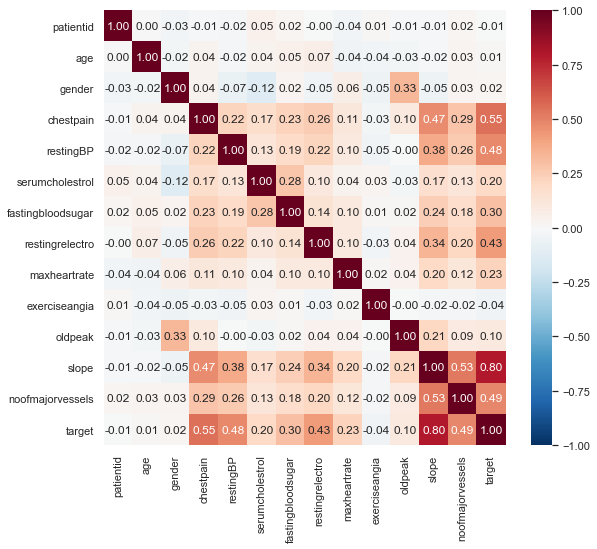

In [34]:
#Heatmap
import numpy as np

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(9,8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, cmap='RdBu_r', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()